In [1]:
%matplotlib inline
import pandas as pd; pd.set_option('display.max_columns', None)
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv("data/ad.csv")

In [3]:
df.columns

Index(['Start Date', 'End Date', 'Campaign Name', 'Ad Group Name', 'Targeting',
       'Match Type', 'Customer Search Term', 'Impressions', 'Clicks',
       'Click-Thru Rate (CTR)', 'Cost Per Click (CPC)', '7 Day Total Sales ',
       'Spend', 'Total Advertising Cost of Sales (ACoS) ',
       'Total Return on Advertising Spend (RoAS)', 'Number of Days', 'Key',
       'Impressions Per Day', 'Spend Per Day', 'Sales Per Day'],
      dtype='object')

In [4]:
#Top search terms to reasess
zero = df.loc[df['Total Advertising Cost of Sales (ACoS) '] == '0']
zero
zero_df = zero.sort_values(by='Spend', ascending=False).head(10)
zero_df

,Start Date,End Date,Campaign Name,Ad Group Name,Targeting,Match Type,Customer Search Term,Impressions,Clicks,Click-Thru Rate (CTR),Cost Per Click (CPC),7 Day Total Sales,Spend,Total Advertising Cost of Sales (ACoS),Total Return on Advertising Spend (RoAS),Number of Days,Key,Impressions Per Day,Spend Per Day,Sales Per Day
376,26-May-21,19-Jun-21,Floral - Manual,Exact Ad Group,bamboo toddler plates,EXACT,bamboo toddler plates,757,33,4.36%,2.15,0.0,70.82,0,0.0,24,bamboo toddler plates Floral - Manual Exact Ad...,31.541667,2.950833,0.0
328,5-Jun-21,19-Jun-21,Floral - ASIN,ASIN,"asin=""B08F2PR7JS""",-,b08f2pr7js,5157,40,0.78%,0.76,0.0,30.31,0,0.0,14,"b08f2pr7js Floral - ASIN ASIN asin=""B08F2PR7JS""",368.357143,2.165000,0.0
357,27-May-21,17-Jun-21,Floral - Manual,Exact Ad Group,plates for kids,EXACT,plates for kids,713,17,2.38%,1.73,0.0,29.47,0,0.0,21,plates for kids Floral - Manual Exact Ad Group...,33.952381,1.403333,0.0
270,25-May-21,12-Jun-21,Rainforest - Manual,Exact Ad Group,plates for kids,EXACT,plates for kids,664,15,2.26%,1.83,0.0,27.42,0,0.0,18,plates for kids Rainforest - Manual Exact Ad G...,36.888889,1.523333,0.0
342,25-May-21,16-Jun-21,Floral - ASIN,ASIN,"asin=""B07KYWP2MT""",-,b07kywp2mt,3552,24,0.68%,0.98,0.0,23.48,0,0.0,22,"b07kywp2mt Floral - ASIN ASIN asin=""B07KYWP2MT""",161.454545,1.067273,0.0
314,27-May-21,17-Jun-21,Floral - ASIN,ASIN,"asin=""B01MG7OE9X""",-,b01mg7oe9x,2136,28,1.31%,0.82,0.0,23.08,0,0.0,21,"b01mg7oe9x Floral - ASIN ASIN asin=""B01MG7OE9X""",101.714286,1.099048,0.0
257,26-May-21,12-Jun-21,Rainforest - ASIN,ASIN,"asin=""B07DD9WBZW""",-,b07dd9wbzw,1011,18,1.78%,1.12,0.0,20.19,0,0.0,17,"b07dd9wbzw Rainforest - ASIN ASIN asin=""B07DD9...",59.470588,1.187647,0.0
163,25-May-21,27-May-21,Rainforest - Manual,Broad Ad Group,kids plates and bowls,BROAD,kids plates and bowls sets,4271,15,0.35%,1.31,0.0,19.69,0,0.0,2,kids plates and bowls sets Rainforest - Manual...,2135.500000,9.845000,0.0
520,28-May-21,8-Jun-21,Floral - Manual,Exact Ad Group,toddler bowls,EXACT,toddler bowls,675,11,1.63%,1.76,0.0,19.40,0,0.0,11,toddler bowls Floral - Manual Exact Ad Group t...,61.363636,1.763636,0.0
229,25-May-21,11-Jun-21,Rainforest - ASIN,ASIN,"asin=""B07KYWP2MT""",-,b07kywp2mt,3495,21,0.60%,0.84,0.0,17.57,0,0.0,17,"b07kywp2mt Rainforest - ASIN ASIN asin=""B07KYW...",205.588235,1.033529,0.0


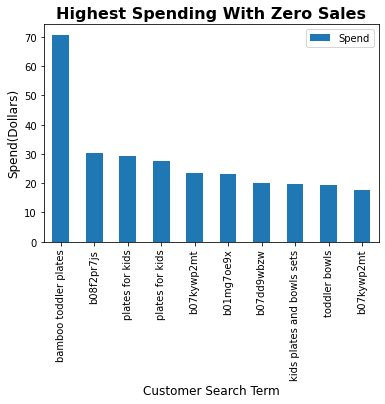

<Figure size 432x288 with 0 Axes>

In [23]:
ax = zero_df.plot.bar(x='Customer Search Term', y='Spend', rot=90)
ax.set_xlabel("Customer Search Term", fontsize=12)
ax.set_ylabel("Spend(Dollars)", fontsize=12)
ax.set_title("Highest Spending With Zero Sales", fontsize=16, fontweight="bold")
plt.show()
plt.savefig('images\zero.png')

C:\Users\rstro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spend', ylabel='7 Day Total Sales '>

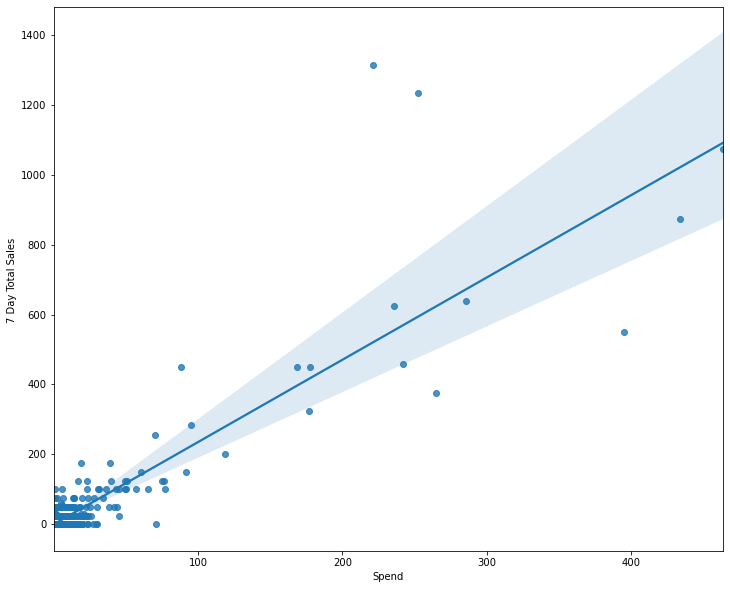

In [24]:
plt.figure(figsize=(12, 10))
sns.regplot(df['Spend'], df['7 Day Total Sales '])


C:\Users\rstro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


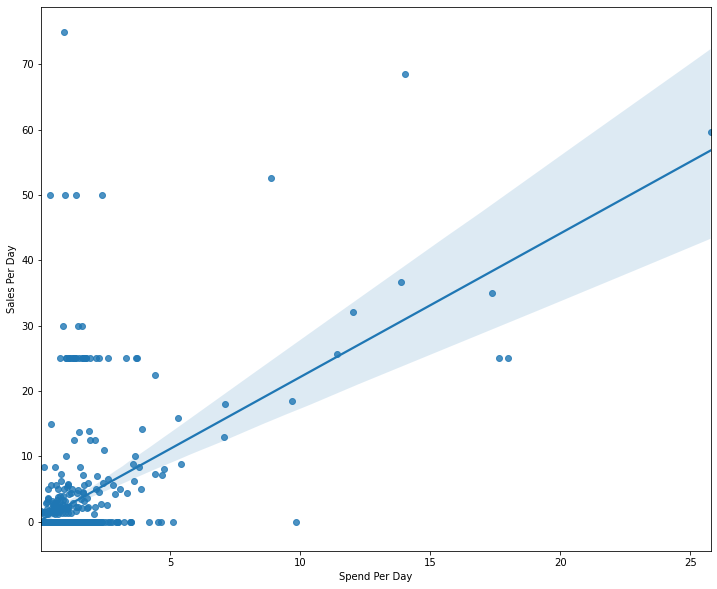

In [25]:
plt.figure(figsize=(12, 10))
sns.regplot(df['Spend Per Day'], df['Sales Per Day'])
plt.savefig('images\sales-spending.png')

C:\Users\rstro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


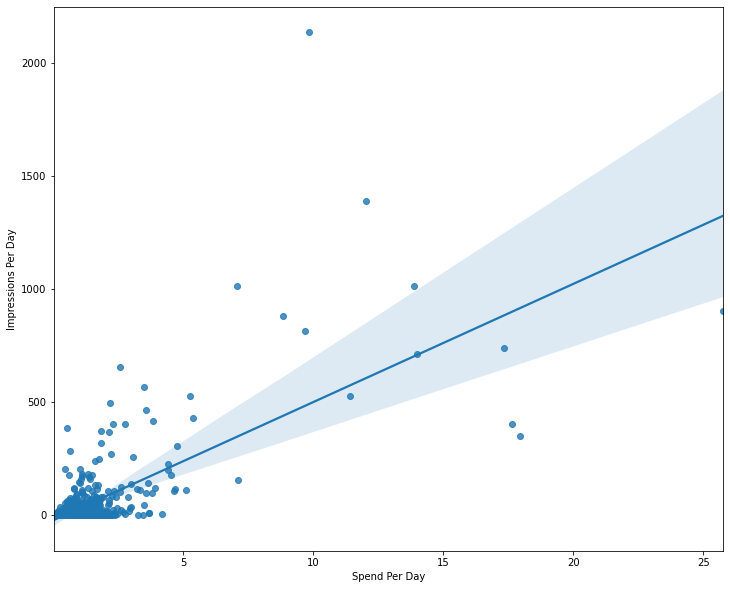

In [26]:
plt.figure(figsize=(12, 10))
sns.regplot(df['Spend Per Day'], df['Impressions Per Day'])
plt.savefig('images\impressions-spending.png')

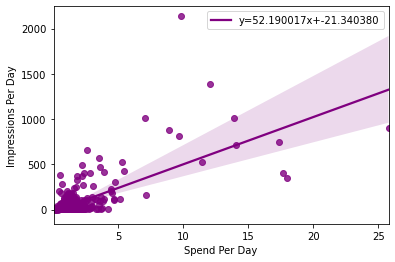

In [27]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Spend Per Day'],df['Impressions Per Day'])
ax = sns.regplot(x='Spend Per Day', y = 'Impressions Per Day', data = df, color='Purple',
                line_kws={'label':"y={0:1f}x+{1:1f}".format(slope,intercept)})
ax.legend()

plt.show()

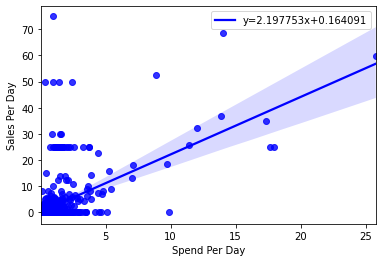

In [28]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Spend Per Day'],df['Sales Per Day'])
ax = sns.regplot(x='Spend Per Day', y = 'Sales Per Day', data = df, color='Blue',
                line_kws={'label':"y={0:1f}x+{1:1f}".format(slope,intercept)})
ax.legend()

plt.show()

In [29]:
res = stats.linregress(df['Spend Per Day'],df['Impressions Per Day'])
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.476277


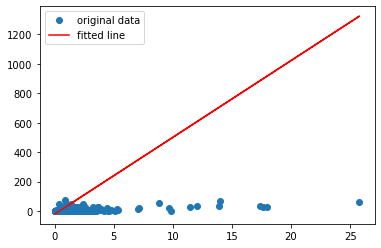

In [30]:
plt.plot(df['Spend Per Day'],df['Sales Per Day'], 'o', label='original data')
plt.plot(df['Spend Per Day'], res.intercept + res.slope*df['Spend Per Day'], 'r', label='fitted line')
plt.legend()
plt.show()

In [31]:
X=df['Spend Per Day']
Y=df['Impressions Per Day']
X

0      1.150000
1      1.667778
2      2.470000
3      1.980000
4      1.610000
         ...   
561    0.040000
562    0.150000
563    0.038750
564    0.240000
565    0.060000
Name: Spend Per Day, Length: 566, dtype: float64

In [32]:
from scipy.stats import linregress
X = df['Spend Per Day'].values
Y = df['Impressions Per Day'].values
linregress(X, Y)

LinregressResult(slope=52.19001690889847, intercept=-21.34037993187095, rvalue=0.690128525471058, pvalue=2.971074298704403e-81, stderr=2.304456805038864)

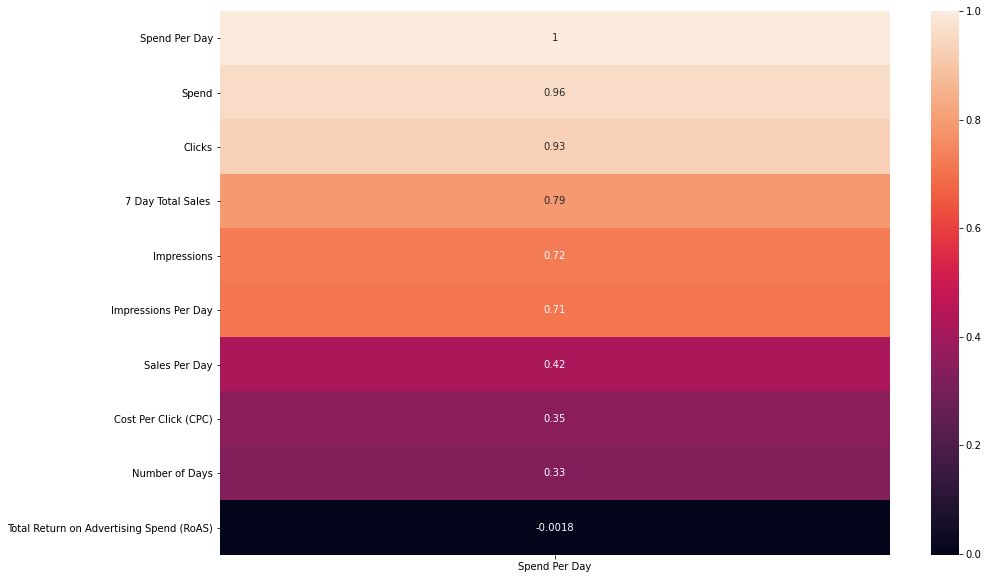

In [33]:
corr = df.loc[df['Campaign Name'] == 'Floral - Manual'].corr()[['Spend Per Day']]
corr = corr.sort_values(by='Spend Per Day', ascending=False)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.savefig('images\heatmap.png')
